# More Regularization

Term 1 2020 - Instructor: Teerapong Leelanupab

Teaching Assistant: 
1. Tiwipab Meephruek (Mil)
2. Jiratkul Wangsiripaisarn (Brooklyn)
3. Hataichanok Sakkara (Pond)

***

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

## Generating data

In [2]:
np.random.seed(42)
x = np.sort(np.random.rand(100))
y = np.cos(1.2 * x * np.pi) + (0.1 * np.random.randn(100))

- The random numbers are added to y so as to generate noise, since the real world data wont be fitting a line exactly and will have some noise.

In [3]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.2)

- Total data is split into train and test data. Test data is 20% of entire data.

## Plotting the generated data

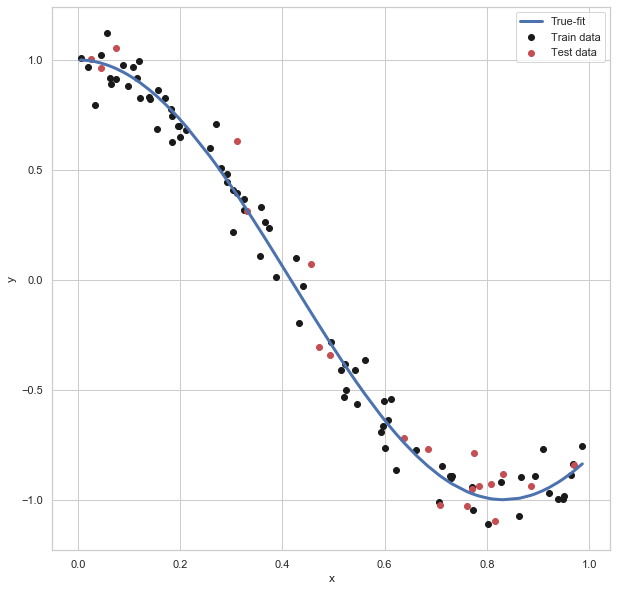

In [4]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
plt.scatter(X_train, Y_train, color = 'k', label = 'Train data')
plt.scatter(X_test, Y_test, color = 'r', label = 'Test data')
plt.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True-fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

- The train data and test data is plotted.
- The true fit line is the actual function from which we generated the data.

## Using an equation of degree 1.

- I will be using an hyothesis made from an equatio of degree 1 for the model.

In [5]:
x_train = X_train.reshape(-1,1)
clf = LinearRegression()
clf.fit(x_train, Y_train)
train_accuracy = clf.score(x_train, Y_train)
print('train accuracy', train_accuracy)

train accuracy 0.92760250535516


In [6]:
x_test = X_test.reshape(-1,1)
test_accuracy = clf.score(x_test, Y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9259414382942456


In [7]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(Y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.040338393489346015


In [8]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(Y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.04068556089245825


Text(0, 0.5, 'y')

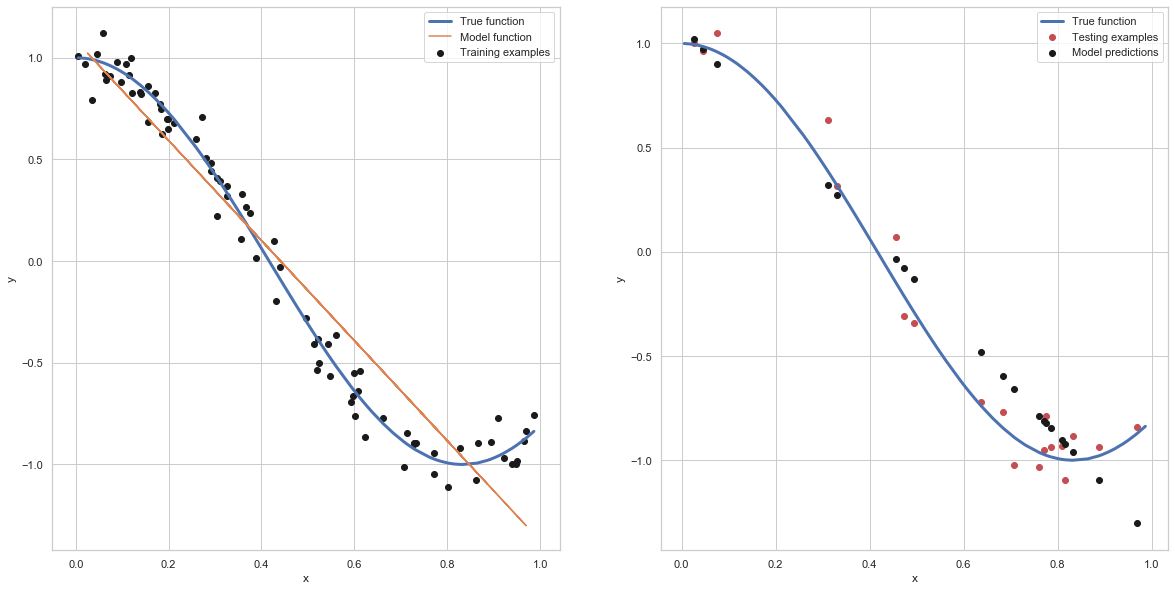

In [9]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax1.plot(X_test, test_predict, label = 'Model function' )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

- The model is under-fit as it is not able to fit the training examples correctly. 
- The training and testing error are also quite high.
- Increasing the degree of the equation may do the job.

## Using an equation of degree 2

In [10]:
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures()
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, Y_train)
train_accuracy = clf.score(x_train, Y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.9541558552139953


In [11]:
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures()
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, Y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9421659027644553


In [12]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(Y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.02554341363098831


In [13]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(Y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.03177232490803649


In [14]:
x_model = x.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

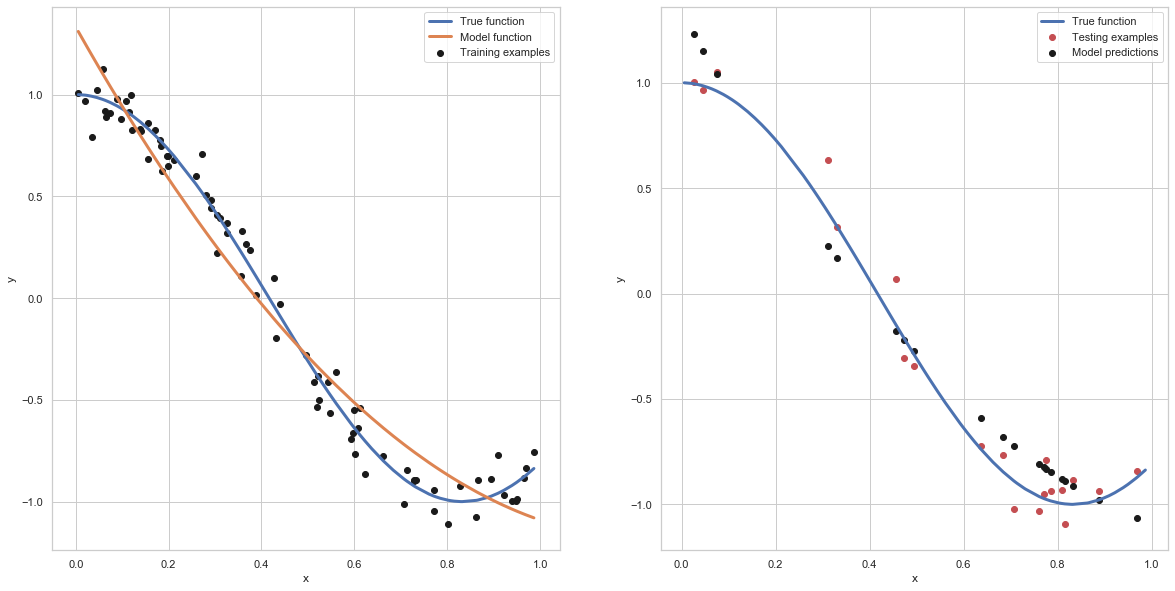

In [15]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

- 2nd degree equation fits the data better when compared to 1st degree equation.
- The errors have been reduced significantly.

## Using an equation of degree 20

In [16]:
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 20)
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, Y_train)
train_accuracy = clf.score(x_train, Y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.9893524210971586


In [17]:
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 20)
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, Y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9745703075178288


In [18]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(Y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.005932611751258881


In [19]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(Y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.013970313197150266


In [20]:
x_model = x.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

Text(0, 0.5, 'y')

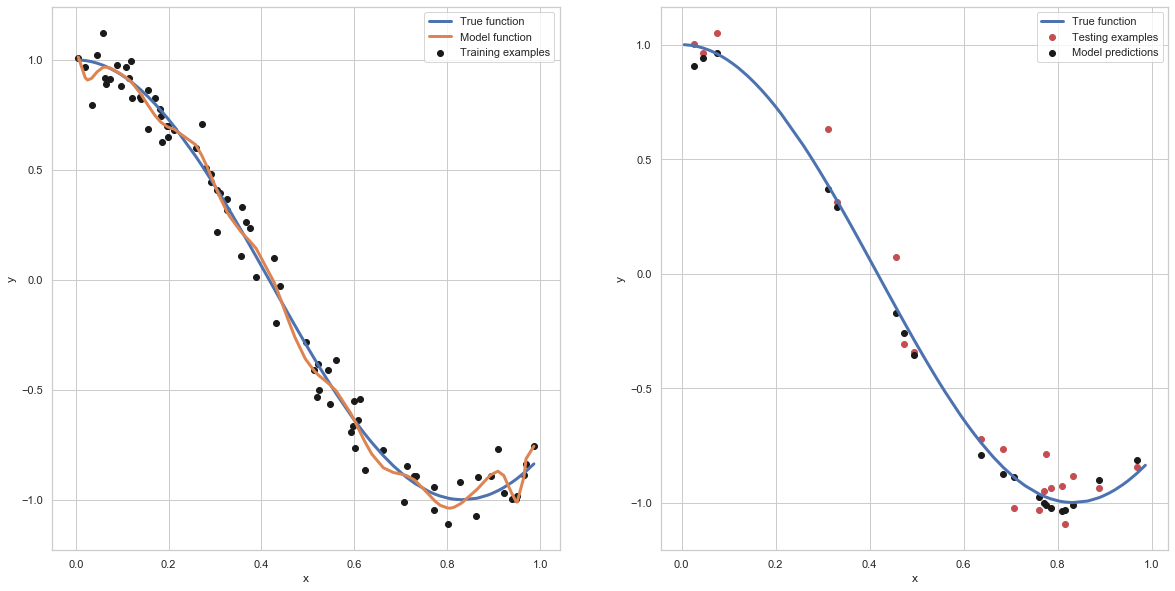

In [21]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

- The model function is very much distorted as its degree is high which makes it flexible enough to try to pass thorugh all the training examples.
- As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

- The optimum model would be the one fitting the data without under-fitting or over-fitting it.
- Such an optimal model can be decided from the scores of Cross-validation and also by checking the MSE of the models using equations of different degrees.

## Checking MSE for different degrees

In [22]:
def Evaluation(degree):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = degree)
    x_train = transf.fit_transform(x_train)
    clf = LinearRegression()
    clf.fit(x_train, Y_train)
    train_accuracy = clf.score(x_train, Y_train)
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = degree)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    return train_accuracy, test_accuracy, train_MSE, test_MSE

In [23]:
Train_acc = []
Test_acc = []
Train_MSE = []
Test_MSE = []

In [24]:
for i in range(40):
    a, b, c, d = Evaluation(i+1)
    Train_acc.append(a)
    Test_acc.append(b)
    Train_MSE.append(c)
    Test_MSE.append(d)

Text(0, 0.5, 'MSE')

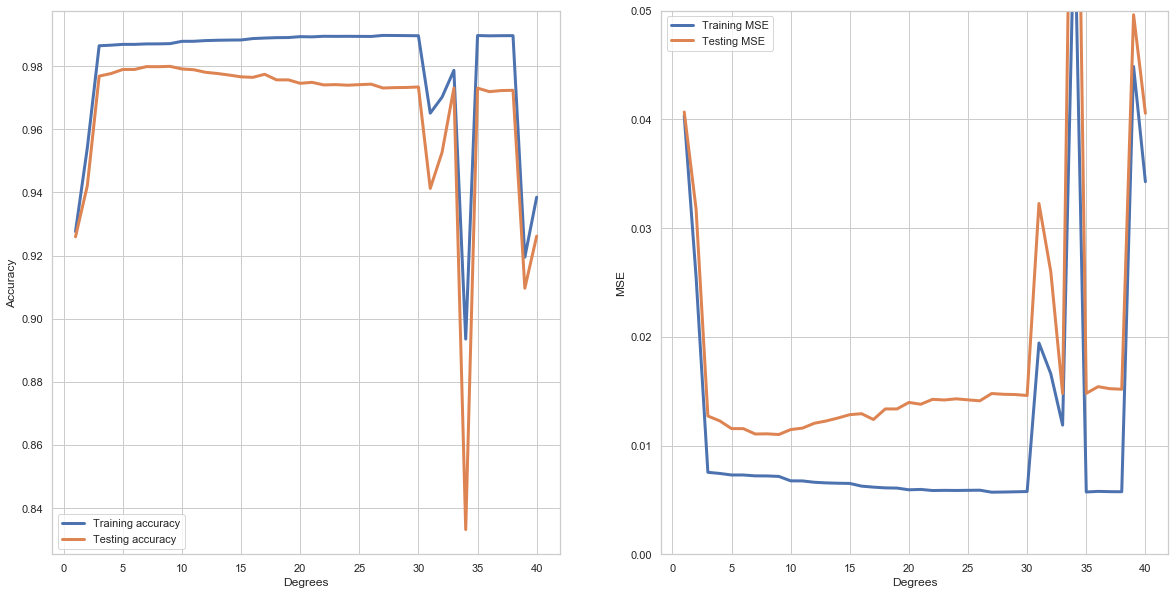

In [25]:
degrees = np.linspace(1, 40, 40)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(degrees, Train_acc, label = 'Training accuracy', linewidth = 3)
ax1.plot(degrees, Test_acc, label = 'Testing accuracy', linewidth = 3)
ax1.legend()
ax1.set_xlabel('Degrees')
ax1.set_ylabel('Accuracy')
ax2.plot(degrees, Train_MSE, label = 'Training MSE', linewidth = 3)
ax2.plot(degrees, Test_MSE, label = 'Testing MSE', linewidth = 3)
plt.ylim(0, 0.05)
plt.legend()
ax2.set_xlabel('Degrees')
ax2.set_ylabel('MSE')

In [26]:
Test_min_degree = Test_MSE.index(min(Test_MSE)) + 1
print('Minimum test error occurs at degree', Test_min_degree )

Minimum test error occurs at degree 9


In [27]:
Train_min_degree = Train_MSE.index(min(Train_MSE)) + 1
print('Minimum training error occurs at degree', Train_min_degree )

Minimum training error occurs at degree 27


- I have calculated the MSE and accuracy scores of the model while using equation upto degree 40. We could find that the model has least testing error at degree 9 and least training error at degree 27.
- The testing error rises after degree 9 as the model begins to overfit and it cannot predict the test values correctly.

- PLotting the model using an equation of degree 9.

In [28]:
x_train = X_train.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 9)
x_train = transf.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train, Y_train)
train_accuracy = clf.score(x_train, Y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.9871428647031711


In [29]:
x_test = X_test.reshape(-1,1)
transf = preprocessing.PolynomialFeatures(degree = 9)
x_test = transf.fit_transform(x_test)
test_accuracy = clf.score(x_test, Y_test)
print('test accuracy', test_accuracy)

test accuracy 0.9799446482491437


In [30]:
train_predict = clf.predict(x_train)
train_MSE = mean_squared_error(Y_train, train_predict)
print('Training MSE:', train_MSE)

Training MSE: 0.007163731083423698


In [31]:
test_predict = clf.predict(x_test)
test_MSE = mean_squared_error(Y_test, test_predict)
print('Test MSE:', test_MSE)

Test MSE: 0.011017810987486717


In [32]:
x_model = x.reshape(-1,1)
x_model = transf.fit_transform(x_model)
y_model = clf.predict(x_model)
x_test = X_test

Text(0, 0.5, 'MSE')

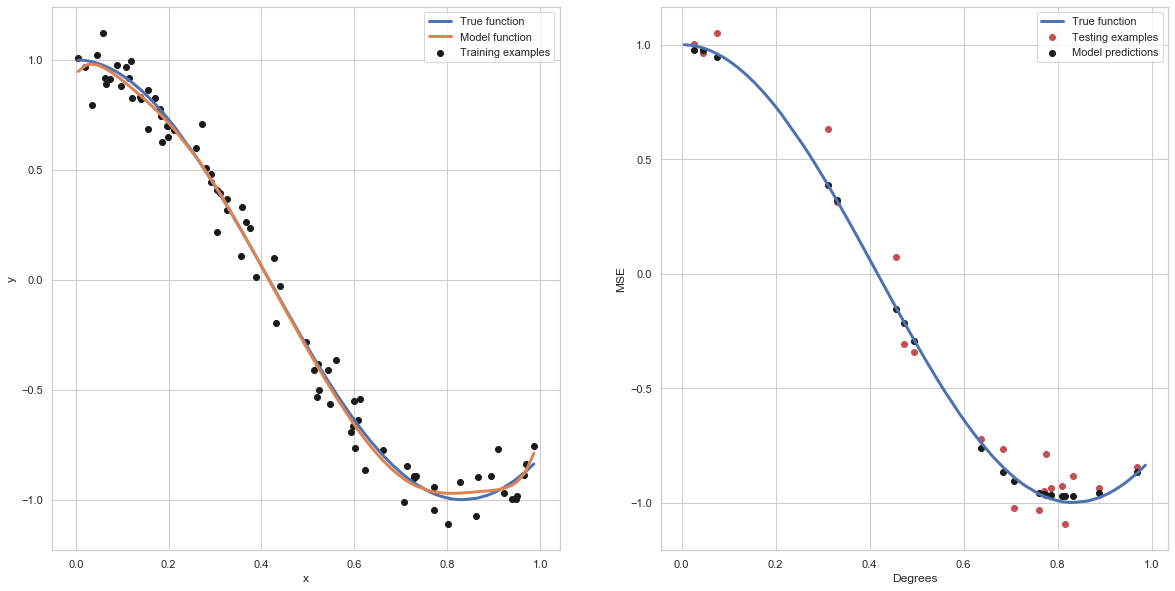

In [33]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
plt.legend()
ax2.set_xlabel('Degrees')
ax2.set_ylabel('MSE')

## Regularization to prevent over-fitting

- The two types of regularization are
1. L1 regularization or LASSO regression
2. L2 regularization or Ridge regression

## Ridge regression

- We will fit a Ridge regression moel on the above data with various lambda values and see the effect of changing lambda on the model.

In [34]:
def ridge_reg(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    clf = Ridge(alpha = lamda)
    clf.fit(x_train, Y_train)
    train_accuracy = clf.score(x_train, Y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = x.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
    ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
    ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.9893497127273314 

Test accuracy: 0.9745585384460298 

Train MSE 0.005934120799166422 

Test MSE 0.013976778773530549 

Parameters: [ 1.01011450e+00  9.83119543e+00 -2.02979091e+03  1.16587064e+05
 -3.35342635e+06  5.87625523e+07 -6.89088088e+08  5.71104103e+09
 -3.46668943e+10  1.57972635e+11 -5.49726293e+11  1.47734582e+12
 -3.08485195e+12  5.01061457e+12 -6.30389008e+12  6.07739879e+12
 -4.40242747e+12  2.31759540e+12 -8.36693018e+11  1.85198151e+11
 -1.89471320e+10]


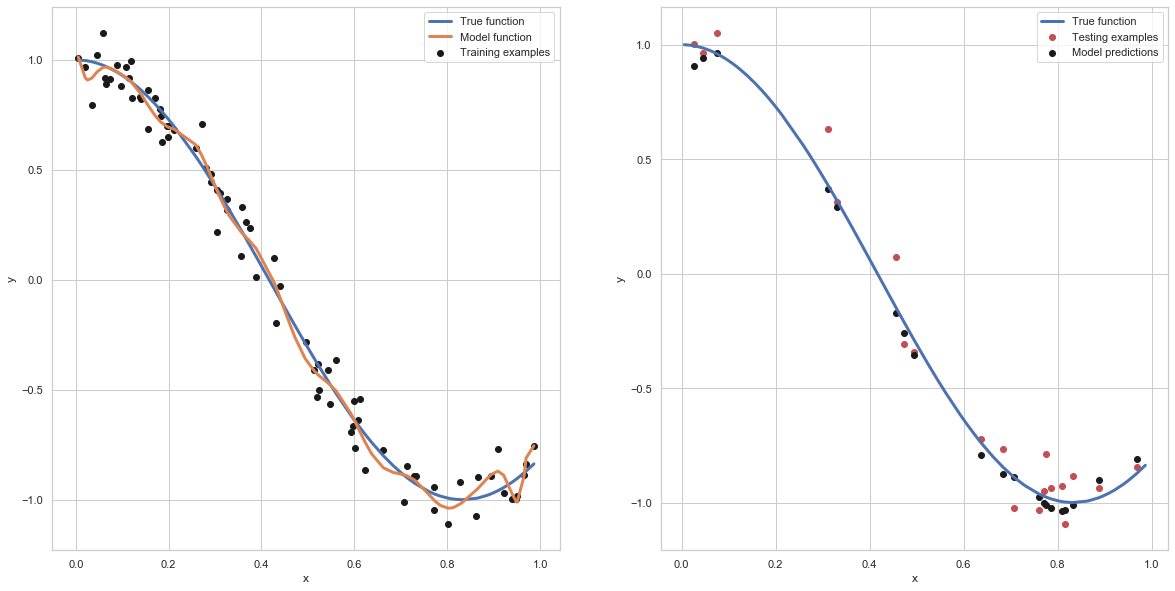

In [35]:
ridge_reg(0)

Train accuracy: 0.9684920881582759 

Test accuracy: 0.9632905358813001 

Train MSE 0.017555559790212706 

Test MSE 0.020167082688763972 

Parameters: [ 1.00326713 -0.73624115 -0.03962705  0.57482941  0.93823368  1.12745805
  1.21347712  1.24142628  1.2378669   1.21806874  1.19071923  1.16070776
  1.13073363  1.10223139  1.07590565  1.05204177  1.03068769  1.01176065
  0.99510999  0.98055406  0.96790156]


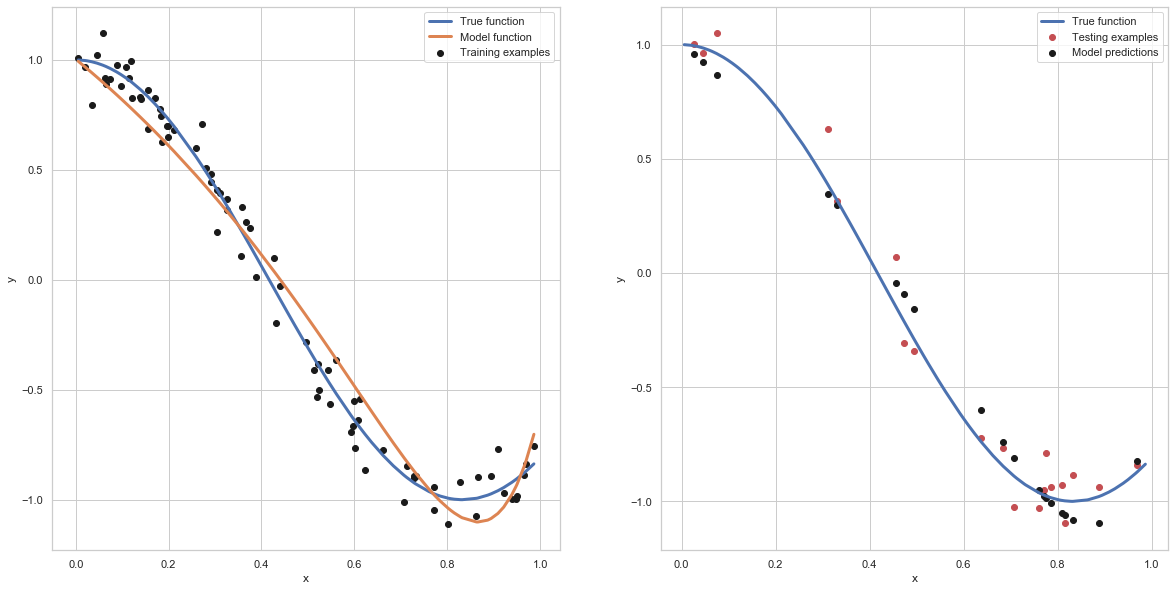

In [36]:
ridge_reg(0.5)    

Train accuracy: 0.951384960753057 

Test accuracy: 0.951708460474526 

Train MSE 0.027087298977174674 

Test MSE 0.026529928838755195 

Parameters: [ 0.92109539 -0.58333661 -0.01689017  0.47435504  0.77378436  0.9411108
  1.02885765  1.07024194  1.08500439  1.08473263  1.07623117  1.06350536
  1.048912    1.03382865  1.01904633  1.00500242  0.9919205   0.97989506
  0.96894337  0.95903748  0.9501241 ]


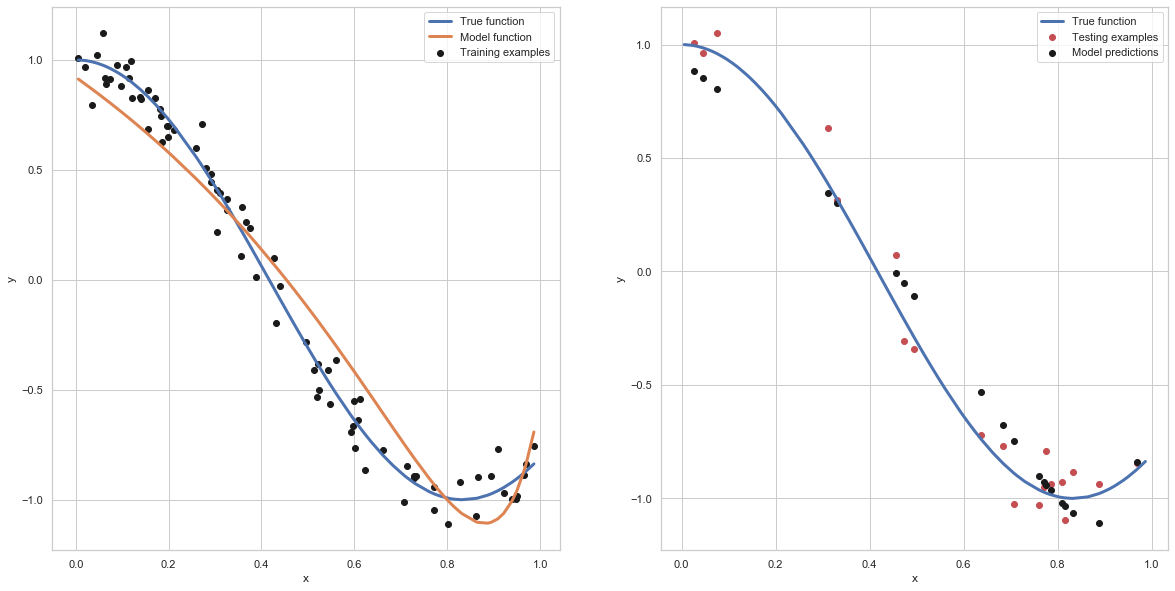

In [37]:
ridge_reg(1)

Train accuracy: 0.7343248781809438 

Test accuracy: 0.6897253416462502 

Train MSE 0.148028708131972 

Test MSE 0.17045562612995319 

Parameters: [ 0.51318215 -0.09690755  0.05169525  0.20537491  0.31341956  0.38590061
  0.43468181  0.4679856   0.49108785  0.50734909  0.51893478  0.52726496
  0.53328883  0.53765307  0.54080627  0.54306498  0.54465599  0.54574412
  0.54645065  0.54686586  0.54705762]


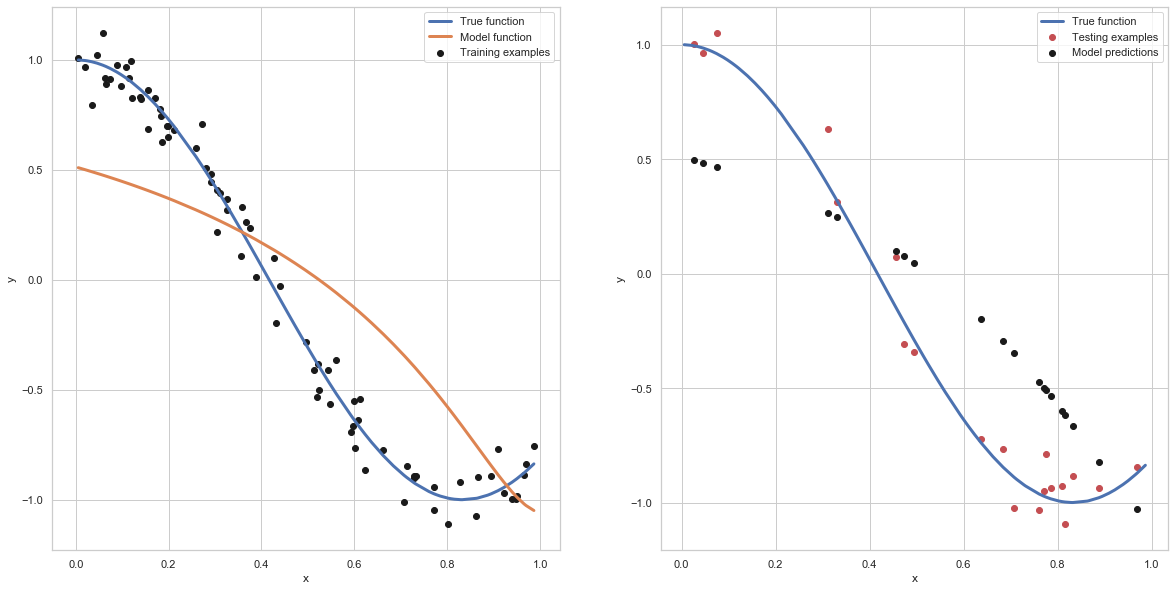

In [38]:
ridge_reg(10)

Train accuracy: 0.32752724035086245 

Test accuracy: 0.11953331538082525 

Train MSE 0.3746879767410118 

Test MSE 0.48370208772324536 

Parameters: [0.15639088 0.02835291 0.04313573 0.06531041 0.08282949 0.09578516
 0.10540694 0.11269745 0.11835116 0.1228354  0.12646613 0.1294603
 0.13196977 0.13410296 0.13593884 0.13753597 0.13893856 0.14018051
 0.14128821 0.1422825  0.14318001]


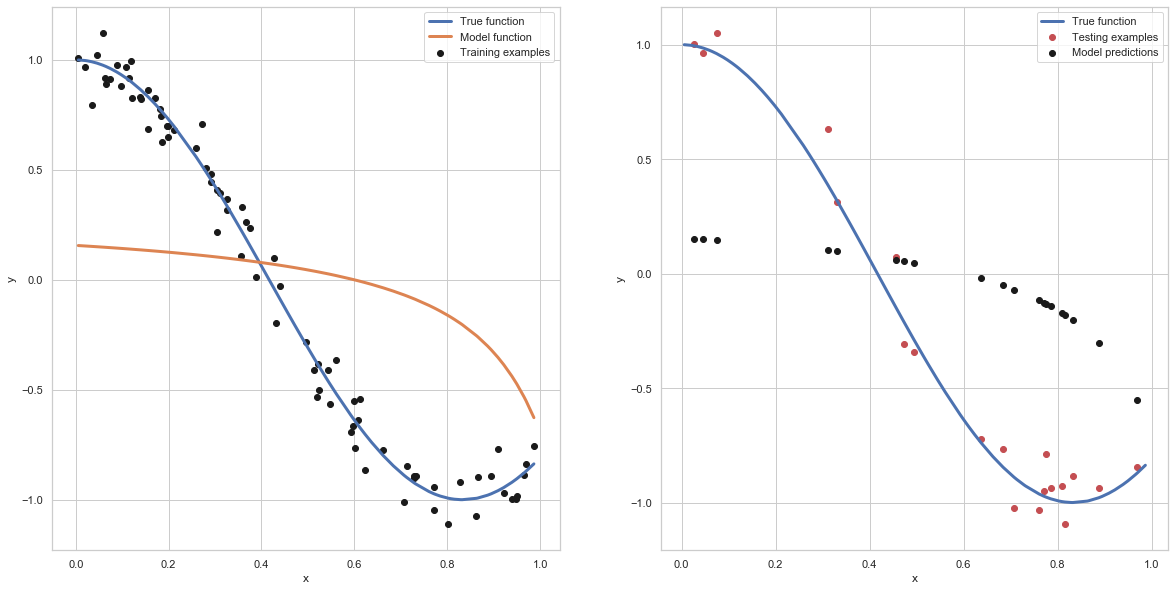

In [39]:
ridge_reg(100)

Train accuracy: 0.05566901988821882 

Test accuracy: -0.19412765840832155 

Train MSE 0.5261617801389462 

Test MSE 0.6560180543685237 

Parameters: [0.02019324 0.00397582 0.00514365 0.00750171 0.00947175 0.01098638
 0.01215111 0.01306343 0.01379391 0.01439135 0.01488943 0.01531169
 0.01567491 0.01599127 0.01626979 0.01651727 0.01673892 0.01693881
 0.01712017 0.01728557 0.01743712]


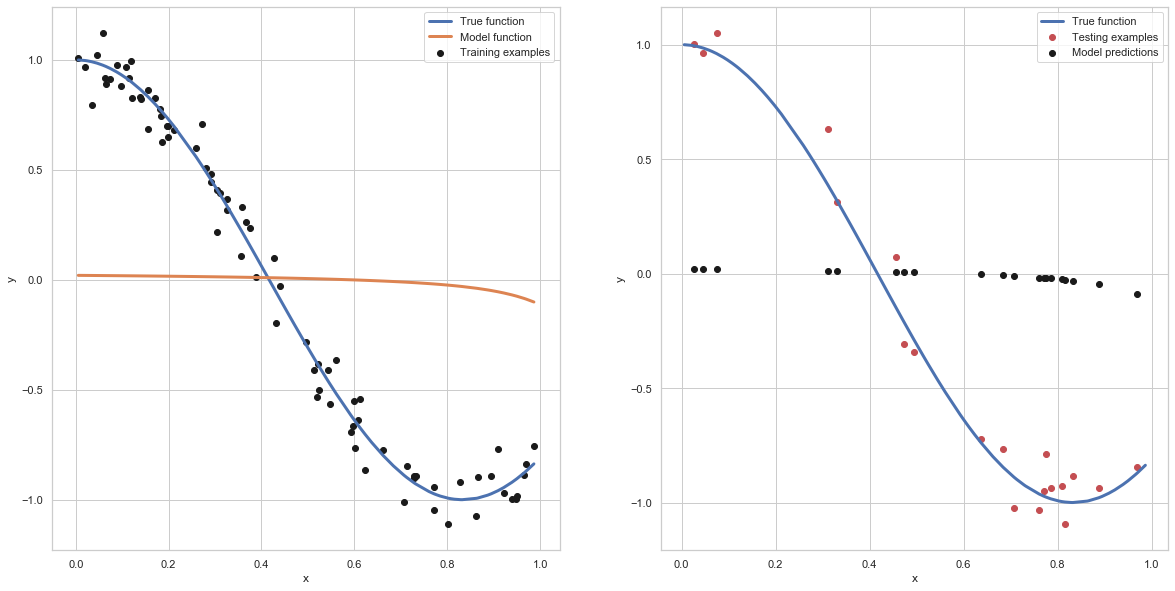

In [40]:
ridge_reg(1000)

Train accuracy: 0.00598366358044522 

Test accuracy: -0.2478511175438551 

Train MSE 0.5538454377466225 

Test MSE 0.6855321175324374 

Parameters: [ 7.59298747e-05 -1.59864470e-03 -1.48732636e-03 -1.24979159e-03
 -1.04968203e-03 -8.94986923e-04 -7.75465974e-04 -6.81440074e-04
 -6.05849341e-04 -5.43793075e-04 -4.91877768e-04 -4.47723687e-04
 -4.09631866e-04 -3.76365596e-04 -3.47007135e-04 -3.20862795e-04
 -2.97399119e-04 -2.76199260e-04 -2.56932649e-04 -2.39333548e-04
 -2.23185647e-04]


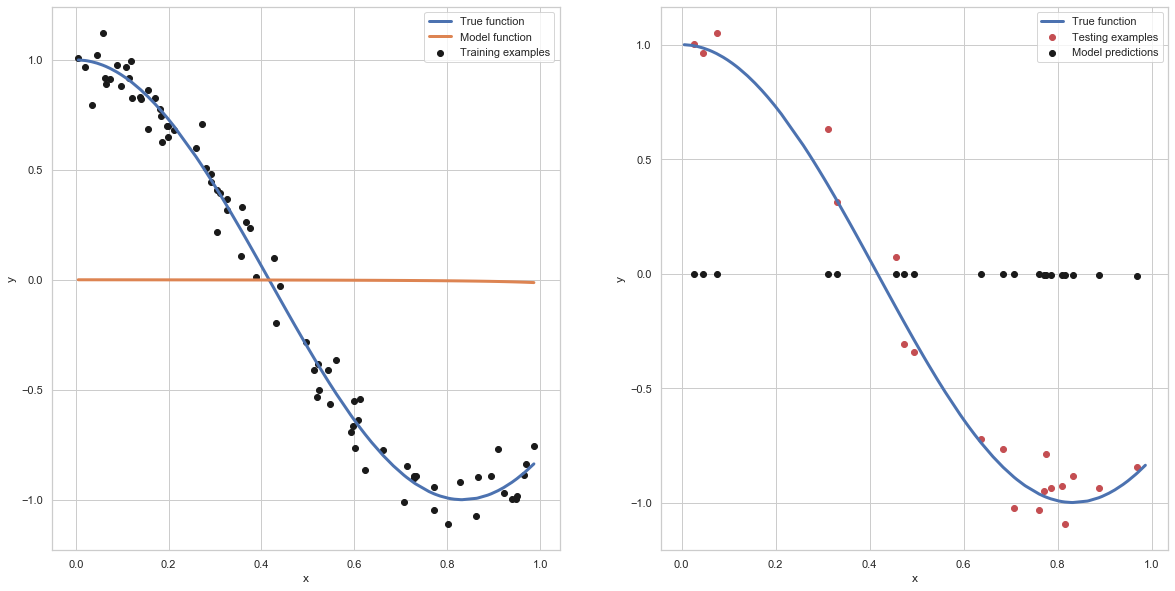

In [41]:
ridge_reg(10000)

Train accuracy: 0.0006028675374458725 

Test accuracy: -0.2536230814242726 

Train MSE 0.5568435065214222 

Test MSE 0.6887030620190294 

Parameters: [-0.00203937 -0.00220739 -0.00219631 -0.00217254 -0.0021525  -0.00213699
 -0.00212501 -0.00211558 -0.00210799 -0.00210176 -0.00209655 -0.00209211
 -0.00208828 -0.00208494 -0.00208199 -0.00207936 -0.002077   -0.00207487
 -0.00207293 -0.00207116 -0.00206953]


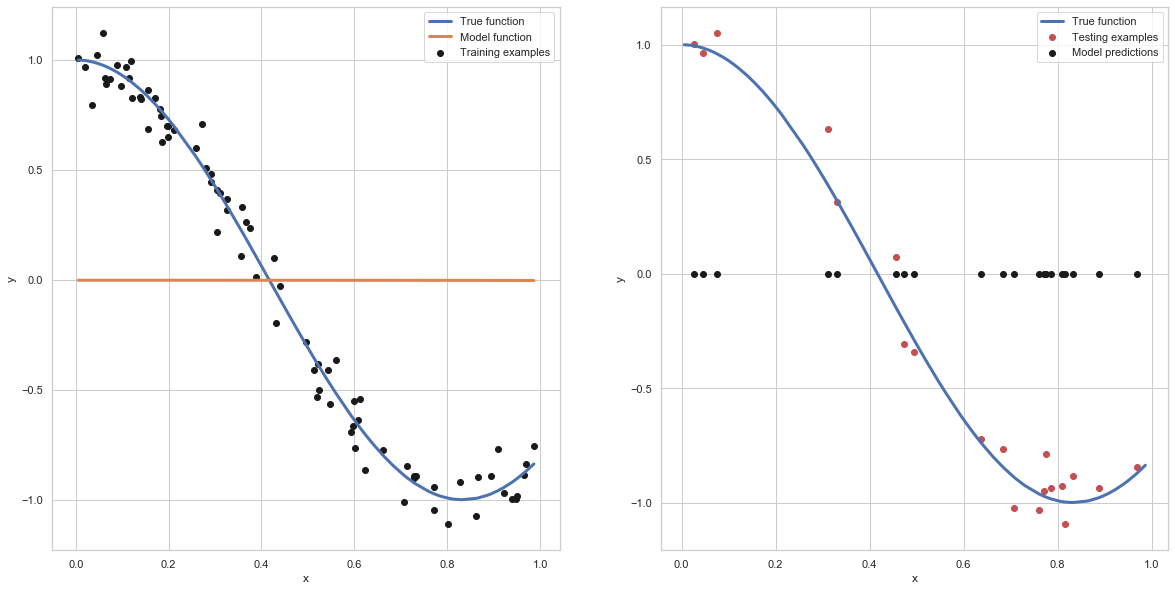

In [42]:
ridge_reg(100000)

Train accuracy: 6.0332124541151444e-05 

Test accuracy: -0.2542045834970237 

Train MSE 0.5571457960837202 

Test MSE 0.6890225218822117 

Parameters: [-0.002252   -0.0022688  -0.0022677  -0.00226532 -0.00226332 -0.00226176
 -0.00226057 -0.00225962 -0.00225886 -0.00225824 -0.00225772 -0.00225728
 -0.00225689 -0.00225656 -0.00225626 -0.002256   -0.00225576 -0.00225555
 -0.00225536 -0.00225518 -0.00225502]


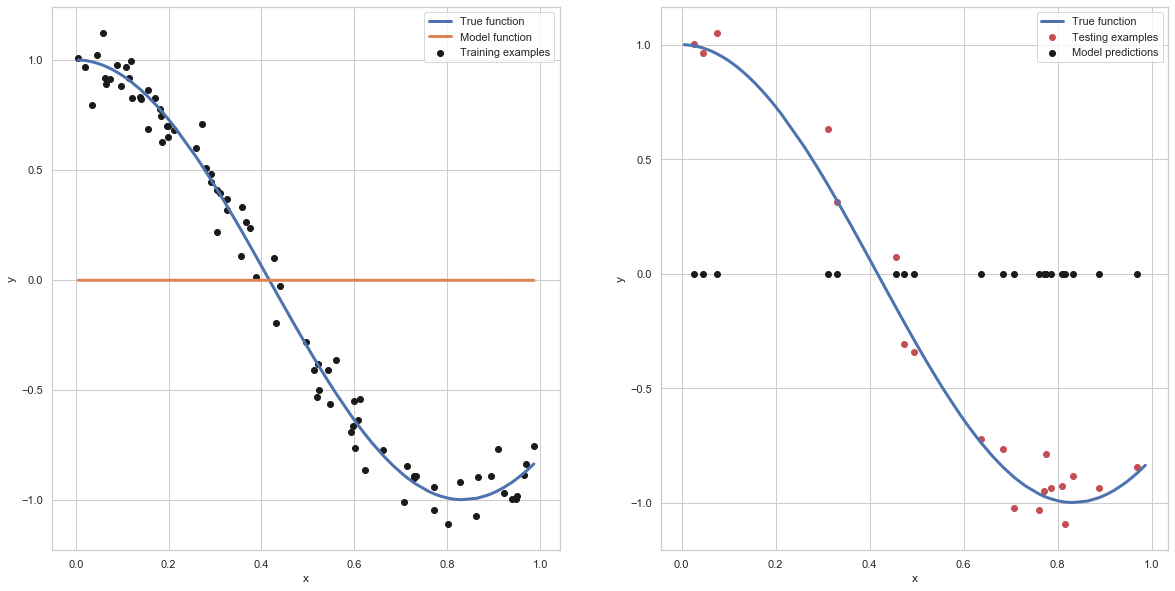

In [43]:
ridge_reg(1000000)

Train accuracy: 6.033711935637953e-07 

Test accuracy: -0.25426859688764214 

Train MSE 0.557179075715384 

Test MSE 0.6890576889262638 

Parameters: [-0.0022754  -0.00227557 -0.00227556 -0.00227553 -0.00227551 -0.0022755
 -0.00227548 -0.00227547 -0.00227547 -0.00227546 -0.00227546 -0.00227545
 -0.00227545 -0.00227544 -0.00227544 -0.00227544 -0.00227544 -0.00227543
 -0.00227543 -0.00227543 -0.00227543]


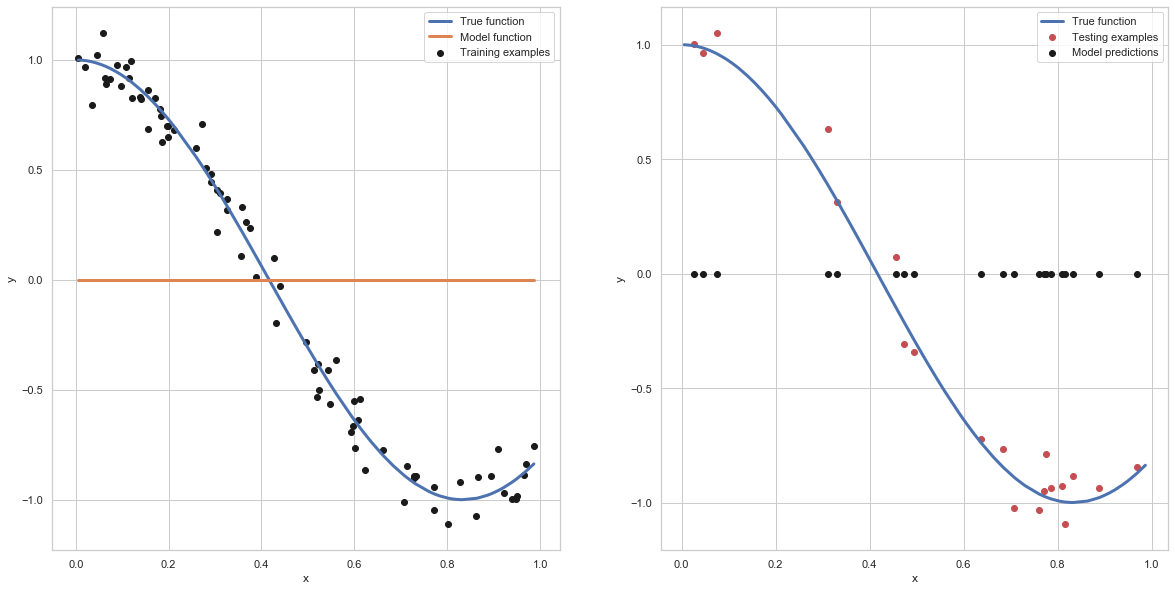

In [44]:
ridge_reg(100000000)

- We can see that as the value of lambda increases the model becomes a straight line parallel to x-axis.

## Lasso Regression

- We will fit a LASSO regression model on above data and see the effect of change in lambda on the model.

In [45]:
def lasso_reg(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    clf = Lasso(alpha = lamda)
    clf.fit(x_train, Y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    train_accuracy = clf.score(x_train, Y_train)
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = x.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
    ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
    ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

Train accuracy: 0.7174573263035269 

Test accuracy: 0.6399908396339367 

Train MSE 0.15742696076724744 

Test MSE 0.19777827544250176 

Parameters: [ 0.56772136 -0.72139651  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136  0.56772136
  0.56772136  0.56772136  0.56772136]


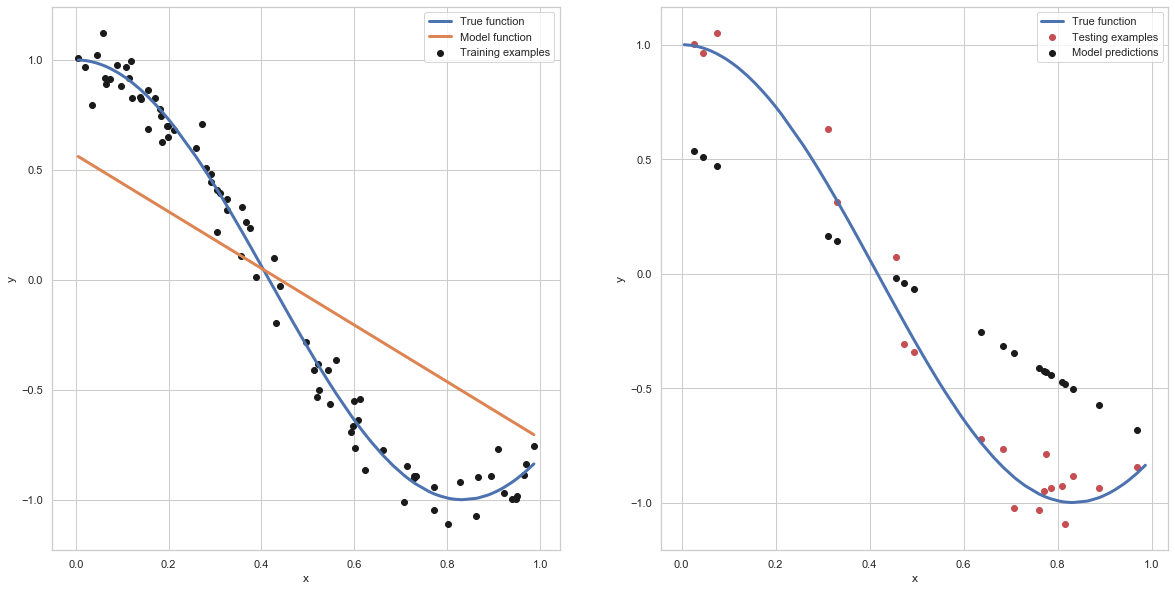

In [46]:
lasso_reg(0.1)

Train accuracy: 0.9539720220207865 

Test accuracy: 0.9496732416520269 

Train MSE 0.025645841701468376 

Test MSE 0.027648017246429825 

Parameters: [ 1.08642937 -1.45760897  1.08642937  1.08642937  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937  1.50375889  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937  1.08642937  1.08642937  1.08642937
  1.08642937  1.08642937  1.08642937]


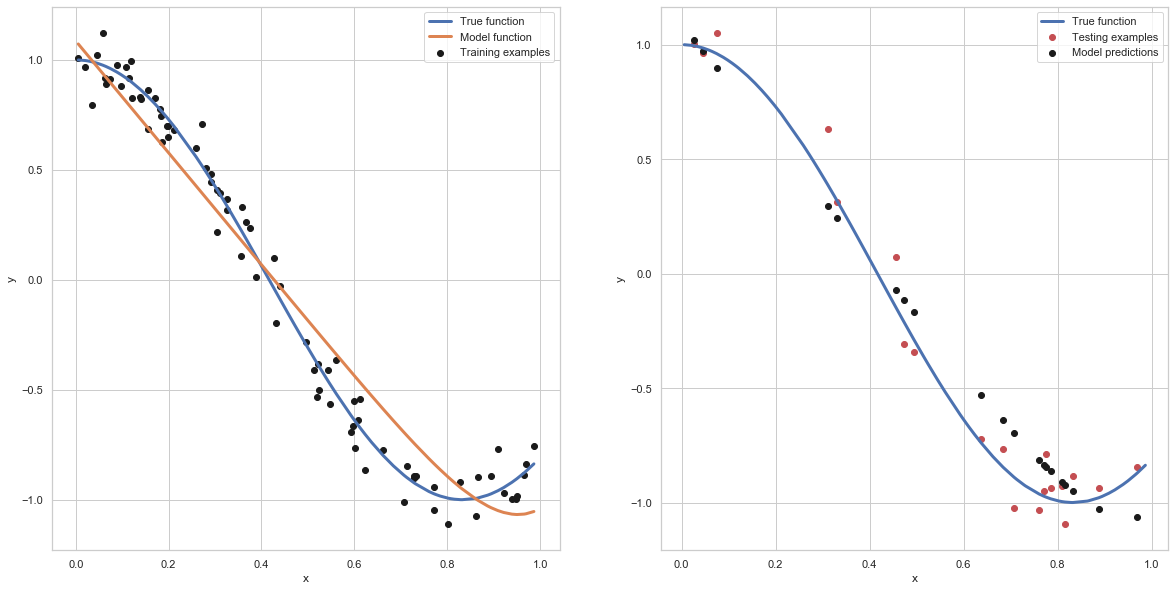

In [47]:
lasso_reg(0.01)

Train accuracy: 0.980329537107391 

Test accuracy: 0.971525880509632 

Train MSE 0.010959976946331992 

Test MSE 0.01564283042637709 

Parameters: [ 1.15209052 -1.17542891  0.05743092  1.15209052  1.15209052  1.15209052
  2.31008147  1.55700984  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052  1.15209052
  1.15209052  1.15209052  1.15209052]


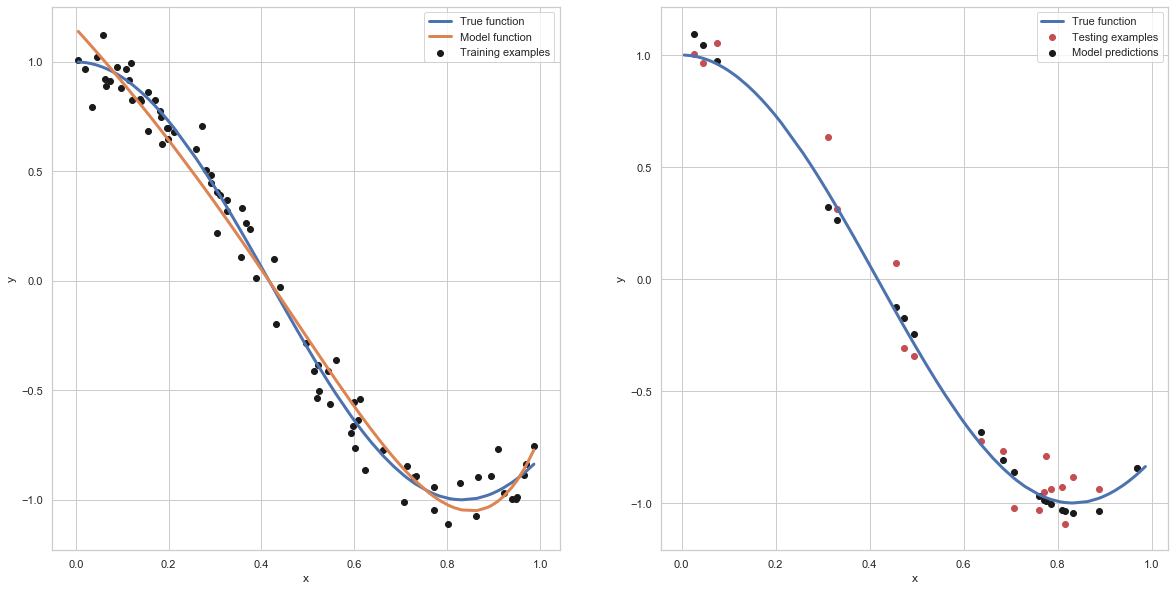

In [48]:
lasso_reg(0.001)

Train accuracy: 0.9828493439420898 

Test accuracy: 0.9730599729321097 

Train MSE 0.009555992456069438 

Test MSE 0.014800045888954408 

Parameters: [ 1.11252636 -0.73922815 -0.94186417  1.11252636  1.11252636  2.61471789
  1.71866187  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636
  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636  1.11252636
  1.11252636  1.11252636  1.0940682 ]


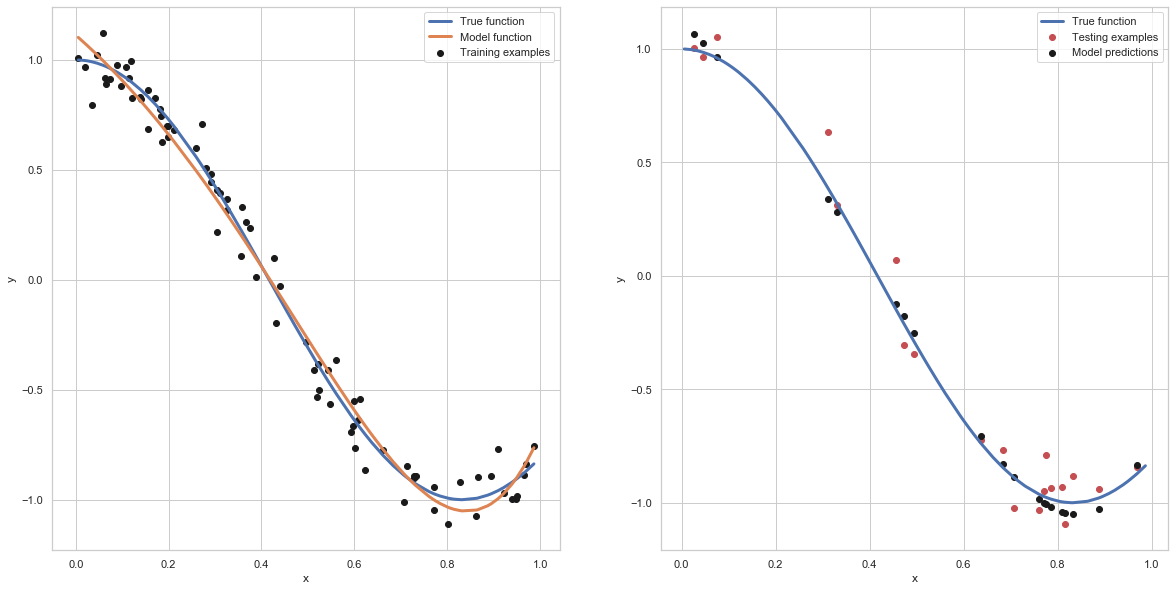

In [49]:
lasso_reg(0.0005)

Train accuracy: 0.0 

Test accuracy: -0.254269243536283 

Train MSE 0.5571794119013908 

Test MSE 0.6890580441757048 

Parameters: [-0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563]


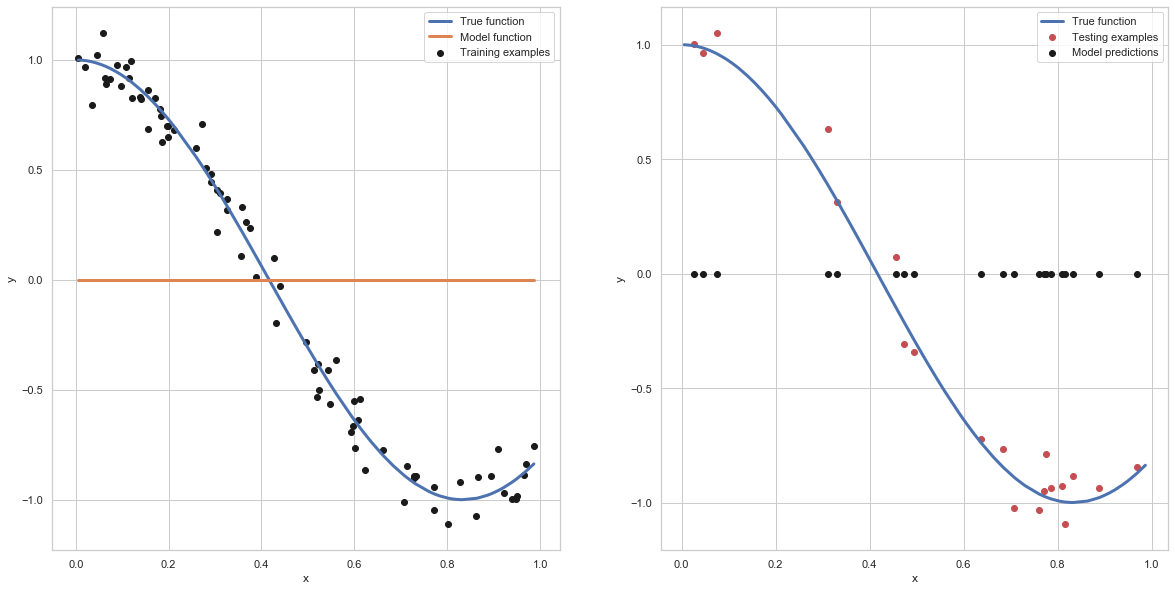

In [50]:
lasso_reg(1)

Train accuracy: 0.0 

Test accuracy: -0.254269243536283 

Train MSE 0.5571794119013908 

Test MSE 0.6890580441757048 

Parameters: [-0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563]


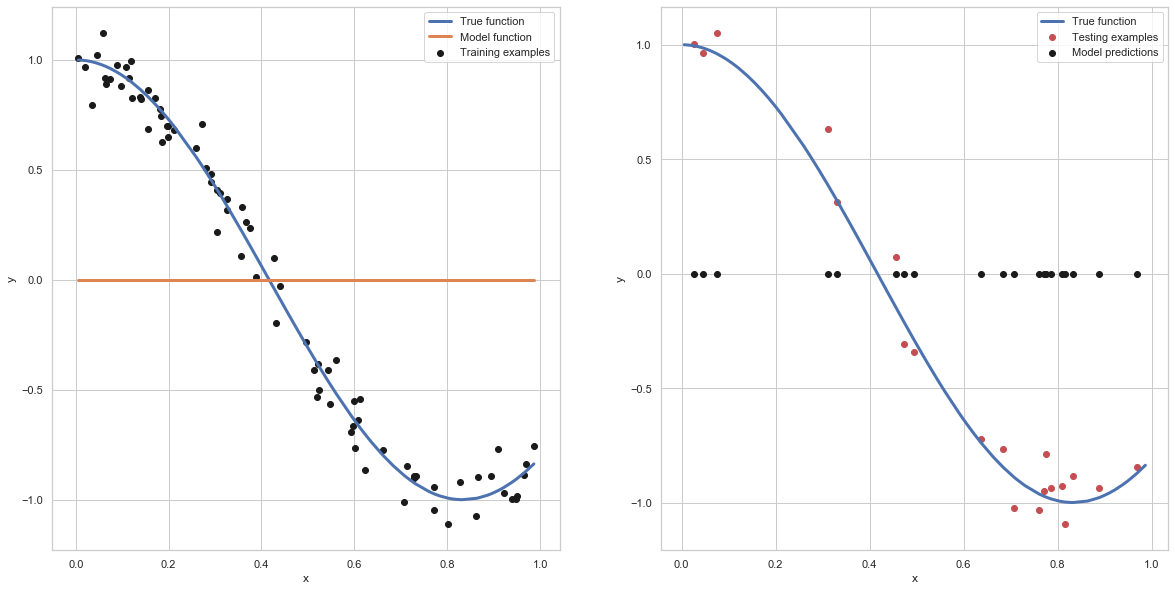

In [51]:
lasso_reg(10)

Train accuracy: 0.0 

Test accuracy: -0.254269243536283 

Train MSE 0.5571794119013908 

Test MSE 0.6890580441757048 

Parameters: [-0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563 -0.00227563
 -0.00227563 -0.00227563 -0.00227563]


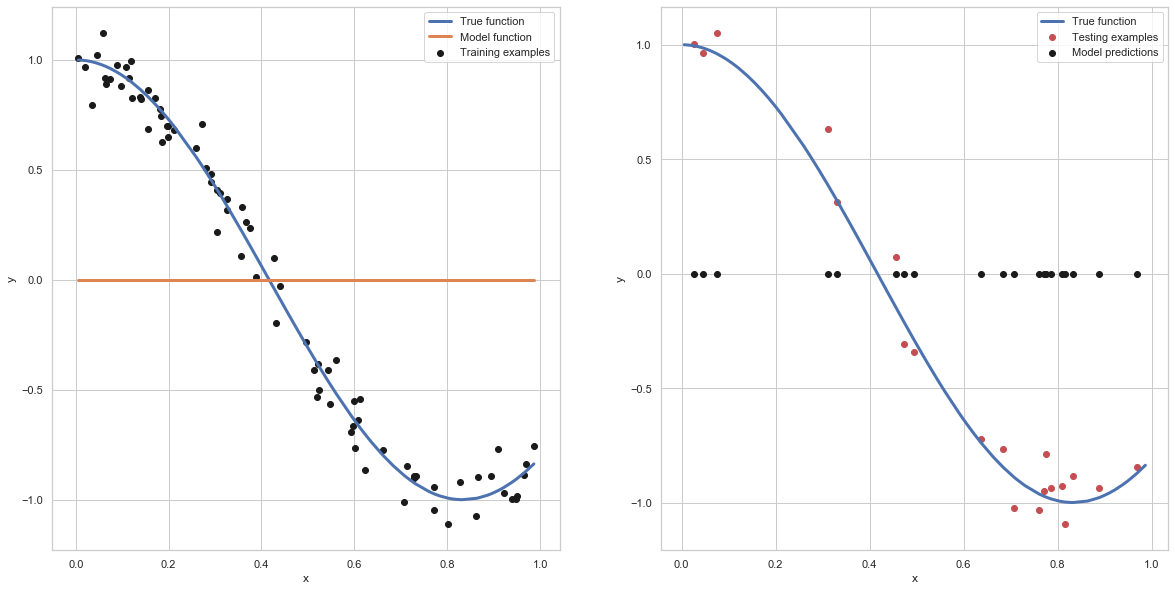

In [52]:
lasso_reg(100)

## Ridge regression with Cross-Validation

- Here I am using the RidgeCV regressor from sklearn.

In [56]:
def ridge_reg_cv(lamda):
    x_train = X_train.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_train = transf.fit_transform(x_train)
    clf = RidgeCV(alphas = lamda, cv = 5)
    clf.fit(x_train, Y_train)
    best_alpha = clf.alpha_
    cv_score = clf.best_score_
    train_accuracy = clf.score(x_train, Y_train)
    intercept = clf.intercept_
    coefficient = clf.coef_
    parameters = coefficient + intercept
    x_test = X_test.reshape(-1,1)
    transf = preprocessing.PolynomialFeatures(degree = 20)
    x_test = transf.fit_transform(x_test)
    test_accuracy = clf.score(x_test, Y_test)
    train_predict = clf.predict(x_train)
    train_MSE = mean_squared_error(Y_train, train_predict)
    test_predict = clf.predict(x_test)
    test_MSE = mean_squared_error(Y_test, test_predict)
    print('Best lambda:', best_alpha)
    print('CV score:', cv_score)
    print('Train accuracy:', train_accuracy, '\n')
    print('Test accuracy:', test_accuracy, '\n')
    print('Train MSE', train_MSE, '\n')
    print('Test MSE', test_MSE, '\n')
    print('Parameters:', parameters)
    x_model = x.reshape(-1,1)
    x_model = transf.fit_transform(x_model)
    y_model = clf.predict(x_model)
    x_test = X_test
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(X_train, Y_train, color = 'k', label = 'Training examples')
    ax1.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax1.plot(x, y_model, label = 'Model function', linewidth = 3 )
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.scatter(X_test, Y_test, color = 'r', label = 'Testing examples')
    ax2.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'True function')
    ax2.scatter(X_test, test_predict,color = 'k', label = 'Model predictions')
    plt.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

- I am inputting certain values of lambda to find the best among them using CV.

In [57]:
ridge_reg_cv(np.array([0.0005, 0.001, 0.01, 0.1, 1, 10, 100]))

AttributeError: 'RidgeCV' object has no attribute 'best_score_'

- Further precision can be obtained in the values of lambda by inputting values around 0.0005.

In [ ]:
ridge_reg_cv(np.array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005]))